In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, LeavePOut, validation_curve, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

# Loading and Preparing the Dataset

In [3]:
# Load movie ratings data set
data = pd.read_csv('movieReplicationSet.csv')

Creating dataframe for only movie ratings, checking for columns and rows that have ALL null values, if any

In [4]:
# Create dataframe with only movie ratings
data_ratings = data.iloc[:,0:400]

# Check for any rows or columns that had ALL null values
participant_null = data_ratings[data_ratings.isna().all(axis=1)]
movie_null = (data_ratings.isna().all()).sum()
print("Participants with no ratings: ")
display(participant_null)
print("Movies with no ratings: " + str(movie_null))

# drop user with all null values
data_ratings = data_ratings.drop(896) #user 896
data_ratings = data_ratings.reset_index(drop=True)

display(data_ratings)

Participants with no ratings: 


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Movies with no ratings: 0


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1092,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


Imputation for missing values

In [5]:
# Calculate the average ratings for each movie and for each participant to fill in null values
avgRatings_movies = np.array(data_ratings.mean(axis=0)) # mean across rows, return 400 values (400,)
avgRatings_participant = np.array(data_ratings.mean(axis=1)) # mean across columns, return 1096 values (1096,)
# print(avgRatings_movies.shape) #(400,)
# print(avgRatings_participant.shape) #(1096,)

# Create new dataframe where every element is the average rating of the corresponding movie and participant
avgRatings_movies_2 = np.vstack([avgRatings_movies]*1096) # stack avg movie rating array vertically, returns 1096 duplicated rows of the 400 avg movie ratings
avgRatings_participant_2 = np.transpose(np.vstack([avgRatings_participant]*400)) # stack avg particpant rating array vertically, returns 400 duplicated rows of the 1096 avg participant ratings, then transpose
# print(np.isnan(avgRatings_movies_2).sum()) #(1096,400)
# print(np.isnan(avgRatings_participant_2).sum()) #(1096,400) # 400 null values????

avgRatings_df = pd.DataFrame((avgRatings_movies_2 + avgRatings_participant_2) / 2)
# print(avgRatings_df.shape) #(1096,400)
data2 = data_ratings
# print(data2.shape) #(1096,400)
# display(avgRatings_df)
# display(data2)

# convert column headings in avgRatings_df to same headings as in data 2
movie_names = list(data2)
avgRatings_df.columns = movie_names
# print(avgRatings_df.shape) #(1096,400)

# overlay the two dataframes so that null values from 1st are replaced with non-nulls in second, new df with all nulls filled
movieRatings_fill = data2.combine_first(avgRatings_df)
# print(movieRatings_fill.shape) #(1096,400)
# display(movieRatings_fill)

movieRatings = movieRatings_fill

display(movieRatings)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.828460,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.820668,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.114439,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.664348,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.500000,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.057031,3.150518,2.879523,2.909476,4.000000,2.739344,2.747727,2.801149,2.657377,2.768981
1092,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,4.000000,3.387353,4.000000,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000
1093,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,3.023296,3.116783,2.845788,2.875741,4.000000,2.705609,2.713992,2.767414,2.623642,2.735247
1094,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.152344,3.245831,2.974835,3.004788,2.500000,2.834657,2.843040,2.896462,2.752690,2.864294


# Question 1:

For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings of the other 399 movies in the dataset to predict the ratings of each movie (that means you’ll have to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that predicts ratings the best. Then report the average COD of those 400 simple linear regression models. Please include a histogram of these 400 COD values and a table with the 10 movies that are most easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict from the ratings of a single other movie (and their associated COD values, as well as which movie ratings are the best predictor, so this table should have 3 columns).

The average COD of the 400 simple linear regression models is: 0.42378171067195985


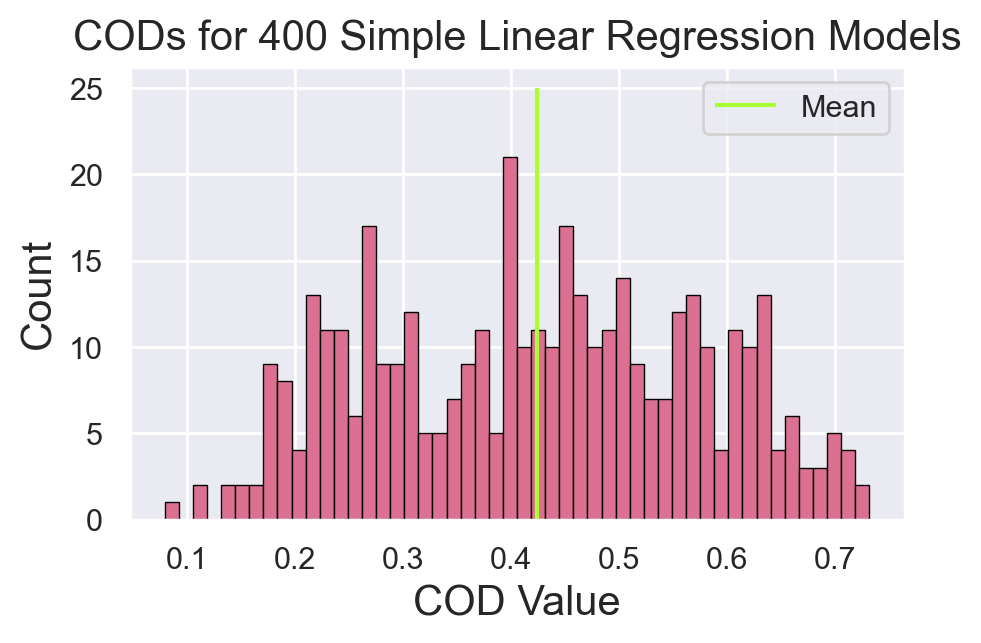

In [6]:
# Create dictionary to obtain COD values for each movie combo
r2_max_dict = {}

# Iterate through all movie combinations, calculate COD
for i in movieRatings:
    r2_dict = {}
    y = movieRatings[i].to_numpy()
    for j in movieRatings:
        if j != i:
            x = movieRatings[j].to_numpy()
            reg = LinearRegression().fit(x.reshape(-1,1), y)
            y_hat = reg.predict(x.reshape(-1,1))

            r2 = r2_score(y,y_hat)
            
            # Add COD values to dictionary
            r2_dict[str(i) + ' vs ' + str(j)] = r2
    
    # Add max COD value for movie i to a new dictionary
    r2_max_dict[max(r2_dict, key=r2_dict.get)] = max(r2_dict.values())
    

# Average COD of 400 Simple Linear Regression Models
avgCOD_SLR = sum(r2_max_dict.values()) / len(r2_max_dict)
print("The average COD of the 400 simple linear regression models is: " + str(avgCOD_SLR))
    
# Plot 400 COD values on histogram
f = plt.figure(figsize = (5,3), dpi = 200)
plt.title('CODs for 400 Simple Linear Regression Models', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('COD Value', fontsize=15)
plt.vlines(avgCOD_SLR, ymin=0, ymax=25, colors='#AAFF32', label='Mean')
plt.legend()
plt.hist(r2_max_dict.values(), bins=50, color='palevioletred', edgecolor='black', linewidth=0.5);

In [7]:
# Sort the COD max dictionary
r2_max_dict_sorted = sorted(r2_max_dict.items(), key=lambda x: x[1])

# Return the 10 movies with high COD, and 10 movies with low COD
first_ten_items = r2_max_dict_sorted[:10]
last_ten_items = r2_max_dict_sorted[390:]

# Convert lists back into dictionaries
moviesEasy={x[0]:x[1] for x in last_ten_items}
moviesHard={x[0]:x[1] for x in first_ten_items}

# Sort Dictionaries
moviesEasy_sorted = sorted(moviesEasy.items(), key=lambda x: x[1], reverse=True)
moviesHard_sorted = sorted(moviesHard.items(), key=lambda x: x[1], reverse=True)

# Convert lists back into dictionaries
moviesEasy={x[0]:x[1] for x in moviesEasy_sorted}
moviesHard={x[0]:x[1] for x in moviesHard_sorted}

# Initialize dictionary for COD table
table_COD = {'Movie': [], 'COD': [], 'Predictor Movie': []}

# Initialize lists
movie_name = []
COD = []
pred_movie_name = []

# Acquire keys and values from moviesEasy and moviesHard
for key, value in moviesEasy.items():
    name = key
    name_split = name.split(' vs ', 2)
    movie_name.append(name_split[0])
    COD.append(value)
    pred_movie_name.append(name_split[1])
    
    
for key, value in moviesHard.items():
    name = key
    name_split = name.split(' vs ', 2)
    movie_name.append(name_split[0])
    COD.append(value)
    pred_movie_name.append(name_split[1])
    
# Create COD table dictionary
table_COD['Movie'] = movie_name
table_COD['COD'] = COD
table_COD['Predictor Movie'] = pred_movie_name

# Convert COD table dictionary into pandas dataframe
table_COD = pd.DataFrame(table_COD)
display(table_COD)

,Movie,COD,Predictor Movie
0,Erik the Viking (1989),0.731507,I.Q. (1994)
1,I.Q. (1994),0.731507,Erik the Viking (1989)
2,The Lookout (2007),0.713554,Patton (1970)
3,Patton (1970),0.713554,The Lookout (2007)
4,The Bandit (1996),0.711222,Best Laid Plans (1999)
5,Best Laid Plans (1999),0.711222,The Bandit (1996)
6,Congo (1995),0.700569,The Straight Story (1999)
7,The Straight Story (1999),0.700569,Congo (1995)
8,The Final Conflict (1981),0.700188,The Lookout (2007)
9,Heavy Traffic (1973),0.692734,Ran (1985)


# Question 2:

For the 10 movies that are best and least well predicted from the ratings of a single other movie (so 20 in total), build multiple regression models that include gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) as additional predictors (in addition to the best predicting movie from question 1). Comment on how R^2 has changed relative to the answers in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple regression models) is on the y-axis.

In [8]:
# each movie uses the 3 new columns plus its best predicting movie

# Create new dataframe with the 20 movies and their best predicting movie, along with 3 personality columns
pers_df = data.iloc[:,474:477]
pers_df = pers_df.drop(896) # drop participant with no ratings here as well
pers_df = pers_df.reset_index(drop=True)

movie_df = movieRatings.loc[:,['Erik the Viking (1989)','I.Q. (1994)','The Lookout (2007)','Patton (1970)',
                           'The Bandit (1996)','Best Laid Plans (1999)','Congo (1995)','The Straight Story (1999)',
                           'The Final Conflict (1981)','Heavy Traffic (1973)','Grown Ups 2 (2013)','The Fast and the Furious (2001)',
                           '13 Going on 30 (2004)','Titanic (1997)','La La Land (2016)','The Cabin in the Woods (2012)',
                           'Clueless (1995)','Black Swan (2010)','Interstellar (2014)','Avatar (2009)',
                            'Ran (1985)','The Core (2003)','Terminator 3: Rise of the Machines (2003)',
                           "Can't Hardly Wait (1998)",'Cocktail (1988)','The Evil Dead (1981)','Escape from LA (1996)',
                           'Sorority Boys (2002)','Torque (2004)','Bad Boys (1995)']]


mulReg_df = pd.concat([movie_df, pers_df], axis=1) # merge columns, 1096 rows
# display(mulReg_df.shape)

# check for null values
# print(mulReg_df.isnull().sum())

mulReg_df = mulReg_df.dropna().reset_index(drop=True) # drop null value rows, 23 rows
# display(mulReg_df.shape)

# drop rows where personality columns were -1, 9 rows
mulReg_df = mulReg_df.loc[mulReg_df["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"] != -1 ]
mulReg_df = mulReg_df.loc[mulReg_df["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"] != -1]
mulReg_df = mulReg_df.reset_index(drop=True)
# display(mulReg_df.shape)

# create dummy columns for gender identity
mulReg_df = pd.get_dummies(data=mulReg_df, columns=['Gender identity (1 = female; 2 = male; 3 = self-described)'], dummy_na=False)
mulReg_df = mulReg_df.drop(columns=['Gender identity (1 = female; 2 = male; 3 = self-described)_3.0'])
mulReg_df = mulReg_df.rename(columns={'Gender identity (1 = female; 2 = male; 3 = self-described)_1.0': 'Gender identity_Female', 
                                      'Gender identity (1 = female; 2 = male; 3 = self-described)_2.0': 'Gender identity_Male',
                                     'Are you an only child? (1: Yes; 0: No; -1: Did not respond)': 'Are you an only child? (1: Yes; 0: No)',
                                     'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)': 'Movies are best enjoyed alone (1: Yes; 0: No)'})


display(mulReg_df) #1064 rows, 34 cols


,Erik the Viking (1989),I.Q. (1994),The Lookout (2007),Patton (1970),The Bandit (1996),Best Laid Plans (1999),Congo (1995),The Straight Story (1999),The Final Conflict (1981),Heavy Traffic (1973),...,Cocktail (1988),The Evil Dead (1981),Escape from LA (1996),Sorority Boys (2002),Torque (2004),Bad Boys (1995),Are you an only child? (1: Yes; 0: No),Movies are best enjoyed alone (1: Yes; 0: No),Gender identity_Female,Gender identity_Male
0,2.415783,2.437605,2.488095,2.510773,2.479638,2.394577,2.396791,2.500216,2.525974,2.486508,...,2.433929,2.641356,2.536969,2.387054,2.430804,2.772291,0,1,1,0
1,2.407991,2.429813,2.480303,2.502981,2.471845,2.386785,2.388999,2.492424,2.518182,2.478716,...,2.426136,2.633564,2.529177,2.379261,2.423011,2.764498,0,0,1,0
2,2.701762,2.723584,2.774074,2.796752,2.765616,2.680556,2.682770,2.786195,2.811953,2.772487,...,2.719907,2.927335,2.822948,2.673032,2.716782,3.058269,1,0,1,0
3,2.251672,2.273494,2.323984,2.346661,2.315526,2.230465,2.232679,2.500000,2.361863,2.322396,...,2.269817,2.477245,2.372858,2.222942,2.266692,2.608179,0,1,1,0
4,2.177829,2.199651,2.250141,2.272819,2.241684,2.156623,2.158837,2.262262,2.288020,2.248554,...,2.195975,2.403402,2.299015,2.149100,2.192850,2.000000,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,2.644355,2.666176,2.716667,2.739344,2.708209,2.623148,2.625362,2.728788,2.754545,2.715079,...,2.662500,2.869928,2.765541,2.615625,2.659375,3.000862,0,0,1,0
1060,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.965623,3.500000,3.000000,...,2.899335,3.500000,3.500000,3.500000,3.000000,3.500000,0,0,1,0
1061,2.610620,2.632442,2.682932,2.705609,2.674474,2.589413,2.591627,2.695053,2.720811,2.681344,...,2.628765,2.836193,2.731806,2.581890,2.625640,2.967127,0,0,1,0
1062,2.739667,2.761489,2.811979,2.834657,2.803521,2.718461,2.720675,2.824100,2.849858,2.810392,...,2.757812,2.965240,2.860853,2.710938,2.754688,3.096175,0,1,1,0


In [9]:
# 20 movies
y1 = mulReg_df['Erik the Viking (1989)'].to_numpy()
y2 = mulReg_df['I.Q. (1994)'].to_numpy()
y3 = mulReg_df['The Lookout (2007)'].to_numpy()
y4 = mulReg_df['Patton (1970)'].to_numpy()
y5 = mulReg_df['The Bandit (1996)'].to_numpy()
y6 = mulReg_df['Best Laid Plans (1999)'].to_numpy()
y7 = mulReg_df['Congo (1995)'].to_numpy()
y8 = mulReg_df['The Straight Story (1999)'].to_numpy()
y9 = mulReg_df['The Final Conflict (1981)'].to_numpy()
y10 = mulReg_df['Heavy Traffic (1973)'].to_numpy()
y11 = mulReg_df['Grown Ups 2 (2013)'].to_numpy()
y12 = mulReg_df['The Fast and the Furious (2001)'].to_numpy()
y13 = mulReg_df['13 Going on 30 (2004)'].to_numpy()
y14 = mulReg_df['Titanic (1997)'].to_numpy()
y15 = mulReg_df['La La Land (2016)'].to_numpy()
y16 = mulReg_df['The Cabin in the Woods (2012)'].to_numpy()
y17 = mulReg_df['Clueless (1995)'].to_numpy()
y18 = mulReg_df['Black Swan (2010)'].to_numpy()
y19 = mulReg_df['Interstellar (2014)'].to_numpy()
y20 = mulReg_df['Avatar (2009)'].to_numpy()

# additional predictors
x1_f = mulReg_df['Gender identity_Female'].to_numpy()
x1_m = mulReg_df['Gender identity_Male'].to_numpy()
x2 = mulReg_df['Are you an only child? (1: Yes; 0: No)'].to_numpy()
x3 = mulReg_df['Movies are best enjoyed alone (1: Yes; 0: No)'].to_numpy()

x5 = mulReg_df['Ran (1985)'].to_numpy()
x6 = mulReg_df['The Core (2003)'].to_numpy()
x7 = mulReg_df['Terminator 3: Rise of the Machines (2003)'].to_numpy()
x8 = mulReg_df["Can't Hardly Wait (1998)"].to_numpy()
x9 = mulReg_df['Cocktail (1988)'].to_numpy()
x10 = mulReg_df['The Evil Dead (1981)'].to_numpy()
x11 = mulReg_df['Escape from LA (1996)'].to_numpy()
x12 = mulReg_df['Sorority Boys (2002)'].to_numpy()
x13 = mulReg_df['Torque (2004)'].to_numpy()
x14 = mulReg_df['Bad Boys (1995)'].to_numpy()

,Movie,New COD,Predictor Movie
0,Erik the Viking (1989),0.731875,I.Q. (1994)
1,I.Q. (1994),0.730661,Erik the Viking (1989)
2,The Lookout (2007),0.712283,Patton (1970)
3,Patton (1970),0.711299,The Lookout (2007)
4,The Bandit (1996),0.715248,Best Laid Plans (1999)
5,Best Laid Plans (1999),0.715179,The Bandit (1996)
6,Congo (1995),0.698739,The Straight Story (1999)
7,The Straight Story (1999),0.699766,Congo (1995)
8,The Final Conflict (1981),0.698561,The Lookout (2007)
9,Heavy Traffic (1973),0.690041,Ran (1985)


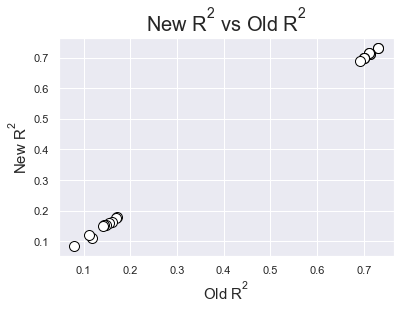

In [10]:
new_r2_list = []

# Erik the Viking (1989) w/ I.Q. (1994)
x = np.concatenate((y2.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1) # predictors 
reg = LinearRegression().fit(x,y1) # linear regression with predictors and outcome y
y_hat = reg.predict(x)
r2 = r2_score(y1,y_hat)
new_r2_list.append(r2)

# I.Q. (1994) w/ Erik the Viking (1989)
x = np.concatenate((y1.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y2)
y_hat = reg.predict(x)
r2 = r2_score(y2,y_hat)
new_r2_list.append(r2)

# The Lookout (2007) w/ Patton (1970)
x = np.concatenate((y4.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y3)
y_hat = reg.predict(x)
r2 = r2_score(y3,y_hat)
new_r2_list.append(r2)

# Patton (1970) w/ The Lookout (2007)
x = np.concatenate((y3.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y4)
y_hat = reg.predict(x)
r2 = r2_score(y4,y_hat)
new_r2_list.append(r2)

# The Bandit (1996) w/ Best Laid Plans (1999)
x = np.concatenate((y6.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y5)
y_hat = reg.predict(x)
r2 = r2_score(y5,y_hat)
new_r2_list.append(r2)

# Best Laid Plans (1999) w/ The Bandit (1996)
x = np.concatenate((y5.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y6)
y_hat = reg.predict(x)
r2 = r2_score(y6,y_hat)
new_r2_list.append(r2)

# Congo (1995) w/ The Straight Story (1999)
x = np.concatenate((y8.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y7)
y_hat = reg.predict(x)
r2 = r2_score(y7,y_hat)
new_r2_list.append(r2)

# The Straight Story (1999) w/ Congo (1995)
x = np.concatenate((y7.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y8)
y_hat = reg.predict(x)
r2 = r2_score(y8,y_hat)
new_r2_list.append(r2)

# The Final Conflict (1981) w/ The Lookout (2007)
x = np.concatenate((y3.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y9)
y_hat = reg.predict(x)
r2 = r2_score(y9,y_hat)
new_r2_list.append(r2)

# Heavy Traffic (1973) w/ Ran (1985)
x = np.concatenate((x5.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y10)
y_hat = reg.predict(x)
r2 = r2_score(y10,y_hat)
new_r2_list.append(r2)

# Grown Ups 2 (2013) w/ The Core (2003)
x = np.concatenate((x6.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y11)
y_hat = reg.predict(x)
r2 = r2_score(y11,y_hat)
new_r2_list.append(r2)

# The Fast and the Furious (2001) w/ Terminator 3: Rise of the Machines (2003)
x = np.concatenate((x7.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y12)
y_hat = reg.predict(x)
r2 = r2_score(y12,y_hat)
new_r2_list.append(r2)

# 13 Going on 30 (2004)	 w/ Can't Hardly Wait (1998)
x = np.concatenate((x8.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y13)
y_hat = reg.predict(x)
r2 = r2_score(y13,y_hat)
new_r2_list.append(r2)

# Titanic (1997) w/ Cocktail (1988)
x = np.concatenate((x9.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y14)
y_hat = reg.predict(x)
r2 = r2_score(y14,y_hat)
new_r2_list.append(r2)

# La La Land (2016) w/ The Lookout (2007)
x = np.concatenate((y3.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y15)
y_hat = reg.predict(x)
r2 = r2_score(y15,y_hat)
new_r2_list.append(r2)

# The Cabin in the Woods (2012) w/ The Evil Dead (1981)
x = np.concatenate((x10.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y16)
y_hat = reg.predict(x)
r2 = r2_score(y16,y_hat)
new_r2_list.append(r2)

# Clueless (1995) w/ Escape from LA (1996)
x = np.concatenate((x11.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y17)
y_hat = reg.predict(x)
r2 = r2_score(y17,y_hat)
new_r2_list.append(r2)

# Black Swan (2010) w/ Sorority Boys (2002)
x = np.concatenate((x12.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y18)
y_hat = reg.predict(x)
r2 = r2_score(y18,y_hat)
new_r2_list.append(r2)

# Interstellar (2014) w/ Torque (2004)
x = np.concatenate((x13.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y19)
y_hat = reg.predict(x)
r2 = r2_score(y19,y_hat)
new_r2_list.append(r2)

# Avatar (2009) w/ Bad Boys (1995)
x = np.concatenate((x14.reshape(-1,1), x1_f.reshape(-1,1), x1_m.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1)), axis=1)
reg = LinearRegression().fit(x,y20)
y_hat = reg.predict(x)
r2 = r2_score(y20,y_hat)
new_r2_list.append(r2)

# Initialize dictionary for New COD table
table_COD2 = {'Movie': [], 'New COD': [], 'Predictor Movie': []}

# Create New COD table dictionary
table_COD2['Movie'] = movie_name
table_COD2['New COD'] = new_r2_list
table_COD2['Predictor Movie'] = pred_movie_name

# Convert COD table dictionary into pandas dataframe
table_COD2 = pd.DataFrame(table_COD2)
# display(table_COD)
display(table_COD2)

plt.scatter(np.array(COD),np.array(new_r2_list), color='white', edgecolor='black', s=100)
plt.title('New $\mathregular{R^{2}}$ vs Old $\mathregular{R^{2}}$', fontsize=20)
plt.ylabel('New $\mathregular{R^{2}}$', fontsize=15)
plt.xlabel('Old $\mathregular{R^{2}}$', fontsize=15);

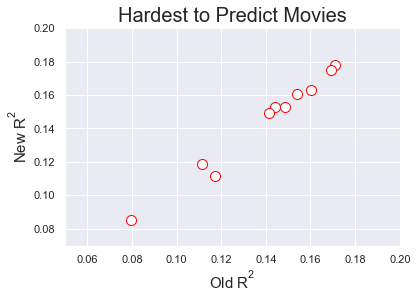

In [11]:
plt.xlim(0.05, 0.2)
plt.ylim(0.07, 0.2)
plt.title('Hardest to Predict Movies', fontsize=20)
plt.ylabel('New $\mathregular{R^{2}}$', fontsize=15)
plt.xlabel('Old $\mathregular{R^{2}}$', fontsize=15)
plt.scatter(np.array(COD),np.array(new_r2_list), color='white', edgecolor='red', s=100);

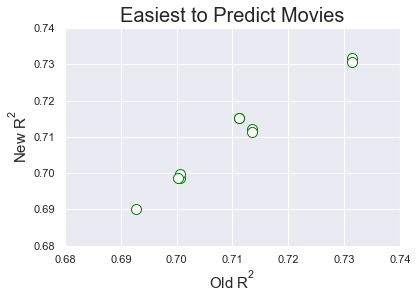

In [12]:
plt.xlim(0.68, 0.74)
plt.ylim(0.68, 0.74)
plt.title('Easiest to Predict Movies', fontsize=20)
plt.ylabel('New $\mathregular{R^{2}}$', fontsize=15)
plt.xlabel('Old $\mathregular{R^{2}}$', fontsize=15)
plt.scatter(np.array(COD),np.array(new_r2_list), color='white', edgecolor='green', s=100);

In [13]:
# subtract new COD values from old to find differences
array1 = np.array(COD)
array2 = np.array(new_r2_list)
subtracted_array = np.subtract(array1, array2)
subtracted = list(subtracted_array)
print(subtracted)

[-0.00036746188133163216, 0.000846145912346663, 0.001271699825148298, 0.0022555271102795427, -0.004026129543503787, -0.003957060892271769, 0.0018303696507937506, 0.000803391215761895, 0.0016266889464950918, 0.0026921592049078402, -0.006904021316837428, -0.006123385737613951, -0.0025589470851699048, -0.00657108698368003, -0.004368394925862273, -0.008971513358100425, -0.007597220748166156, 0.005311703510818111, -0.00768874429695332, -0.005580655753655073]


# Question 3:

Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in question 2). Now build a regularized regression model with the ratings from 10 other movies (picked randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you find by doing so.

Prepare the 30 movies in middle of COD range and 10 randomly picked movies

In [14]:
# Pick 30 movies in the middle of the COD range
mid_30_movies = r2_max_dict_sorted[185:215] # remove movie idx 196, "the evil dead" used in Q2???: r2_max_dict_sorted[185:196] + r2_max_dict_sorted[197:216]
moviesMid={x[0]:x[1] for x in mid_30_movies} # Convert lists back into dictionaries
moviesMid_name = [] # Initialize list

for key, value in moviesMid.items():  # Acquire keys and values from moviesMid
    name = key
    name_split = name.split(' vs ', 2)
    moviesMid_name.append(name_split[0])

# Pick 10 other movies in middle of COD range from Q1
other_movies_10 = r2_max_dict_sorted[50:60]
movies10={x[0]:x[1] for x in other_movies_10}  # Convert lists back into dictionaries
movies10_name = []  # Initialize list

for key, value in movies10.items():  # Acquire keys and values from movies10
    name = key
    name_split = name.split(' vs ', 2)
    movies10_name.append(name_split[0])

# Create df for 30 movies:
movies_30 = []
for i in movieRatings:
    for j in moviesMid_name:
        if i == j:
            movies_30.append(movieRatings[i])
movies_30 = pd.DataFrame(movies_30).transpose()

# Create df for 10 movies:
movies_10 = []
for i in movieRatings:
    for j in movies10_name:
        if i == j:
            movies_10.append(movieRatings[i])
movies_10 = pd.DataFrame(movies_10).transpose() # do i need to transpose? .transpose()


# prepare dataframes for regression model
outcomes = movies_30
predictors = movies_10

# display(outcomes)
# display(predictors)

Hyperparameter Tuning: GridSearch Method (Method used in report)

(Each model has a most suitable alpha)

In [16]:
#create alpha range
parameters = {'alpha':[c for c in np.arange(0, 200, 0.1)]}

# set up gridsearchCV
model = Ridge()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10) #cross-validation method for gridsearch
ridge_grid = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=cv)

# intitialize lists
rmse_rigGrid = []
movie_name_rigGrid = []
betas_rigGrid = []
alpha_rigGrid = []

# loop through 30 movies
for i in outcomes:
    Y = np.array(outcomes[i])
    X = np.array(predictors)
    
    # split data set into train test splits
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
    
    # use gridsearch to split training data into train and validation set and find best alpha hyperparameter
    ridge_grid.fit(x_train, y_train)
    best_alpha = ridge_grid.best_estimator_.alpha
    print("The best parameters of Grid Search are as follows: {} with a score of {}".format(ridge_grid.best_params_, np.round(ridge_grid.best_score_, 3)))
    
    # Use Best Alpha for calculating coefficients and RMSE
    ridgeReg = Ridge(alpha=best_alpha) # input best alpha found for that model
    ridgeReg.fit(x_train, y_train)
    y_pred = ridgeReg.predict(x_test)
    
    # append values to lists
    movie_name_rigGrid.append(i)
    rmse_rigGrid.append(mean_squared_error(y_test, y_pred))
    betas_rigGrid.append(ridgeReg.coef_)
    alpha_rigGrid.append(best_alpha)

The best parameters of Grid Search are as follows: {'alpha': 117.60000000000001} with a score of -0.106
The best parameters of Grid Search are as follows: {'alpha': 99.60000000000001} with a score of -0.101
The best parameters of Grid Search are as follows: {'alpha': 155.0} with a score of -0.146
The best parameters of Grid Search are as follows: {'alpha': 132.8} with a score of -0.124
The best parameters of Grid Search are as follows: {'alpha': 41.5} with a score of -0.116
The best parameters of Grid Search are as follows: {'alpha': 63.1} with a score of -0.114
The best parameters of Grid Search are as follows: {'alpha': 41.2} with a score of -0.124
The best parameters of Grid Search are as follows: {'alpha': 80.0} with a score of -0.135
The best parameters of Grid Search are as follows: {'alpha': 137.5} with a score of -0.087
The best parameters of Grid Search are as follows: {'alpha': 102.5} with a score of -0.15
The best parameters of Grid Search are as follows: {'alpha': 80.300000

In [17]:
# Initialize dictionary for RMSE table
table_RMSE_rigGrid = {'Movie': [], 'RMSE': [], 'alpha': []}

# Create New COD table dictionary
table_RMSE_rigGrid['Movie'] = movie_name_rigGrid
table_RMSE_rigGrid['RMSE'] = rmse_rigGrid
table_RMSE_rigGrid['alpha'] = alpha_rigGrid

# Convert RMSE table dictionary into pandas dataframe
table_RMSE_rigGrid = pd.DataFrame(table_RMSE_rigGrid)
display(table_RMSE_rigGrid)

# Create dataframe for coefficients
betas_df_rigGrid = pd.DataFrame(columns=predictors.columns)
betas_df_rigGrid = betas_df_rigGrid.append(pd.DataFrame(betas_rigGrid, columns=betas_df_rigGrid.columns))
betas_df_rigGrid_2 = betas_df_rigGrid
betas_df_rigGrid_3 = betas_df_rigGrid_2.set_index(outcomes.columns)

display(betas_df_rigGrid_3)

,Movie,RMSE,alpha
0,Let the Right One In (2008),0.107464,117.6
1,The Machinist (2004),0.147840,99.6
2,Man on Fire (2004),0.187638,155.0
3,Crossroads (2002),0.176966,132.8
4,The Poseidon Adventure (1972),0.135833,41.5
5,The Rock (1996),0.122046,63.1
6,Gone in Sixty Seconds (2000),0.134360,41.2
7,Blues Brothers 2000 (1998),0.151285,80.0
8,Equilibrium (2002),0.120634,137.5
9,The Blue Lagoon (1980),0.132433,102.5


,Django Unchained (2012),Poltergeist (1982),Godzilla (1998),Dead Poets Society (1989),The Shining (1980),Cheaper by the Dozen (2003),My Big Fat Greek Wedding (2002),A Bug's Life (1998),Spirited Away (2001),How the Grinch Stole Christmas (2000)
Let the Right One In (2008),0.080108,0.02871,0.057691,0.043335,0.083572,0.05618,0.070707,0.028201,0.059542,0.038631
The Machinist (2004),0.10282,0.0353,0.057836,0.107625,0.096676,0.034849,0.063933,0.04368,0.070354,0.027372
Man on Fire (2004),0.08628,0.067363,0.066774,0.085509,0.058321,0.066173,0.066227,0.056288,0.034789,0.026114
Crossroads (2002),0.07142,0.055053,0.065477,0.04971,0.073747,0.086946,0.056936,0.041686,0.041337,0.04546
The Poseidon Adventure (1972),0.111581,0.072195,0.102767,0.0375,0.056394,0.057663,0.048785,0.044785,0.017697,0.02369
The Rock (1996),0.055679,0.07839,0.139391,0.105957,0.053213,0.034069,0.049417,0.037837,0.058654,0.040031
Gone in Sixty Seconds (2000),0.071107,0.044376,0.143031,0.09284,0.066651,0.061208,0.049824,0.016188,0.03419,0.03118
Blues Brothers 2000 (1998),0.084943,0.069647,0.089049,0.101353,0.072376,0.060109,0.0433,0.018712,0.051613,0.05423
Equilibrium (2002),0.103125,0.079764,0.062701,0.081605,0.053724,0.055321,0.042858,0.030807,0.01966,0.017906
The Blue Lagoon (1980),0.057211,0.06279,0.113048,0.040426,0.099787,0.066451,0.068543,0.014013,0.060627,0.079345


Hyperparameter Tuning (**Alternate Method):

Averaging the alpha values found through GridSearch to apply one alpha value to all models

In [18]:
avg_alpha = (np.array(alpha_rigGrid)).mean()
print('Average Value of Most Suitable Alphas: ', avg_alpha)

# intitialize lists
rmse_rigGrid_avg = []
movie_name_rigGrid_avg = []
betas_rigGrid_avg = []

# loop through 30 movies
for i in outcomes:
    Y = np.array(outcomes[i])
    X = np.array(predictors)
    
    # split data set into train test splits
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

    # Use Best Alpha for calculating coefficients and RMSE
    ridgeReg = Ridge(alpha=avg_alpha) # input avg of best alphas found for all models
    ridgeReg.fit(x_train, y_train)
    y_pred = ridgeReg.predict(x_test)
    
    # append values to lists
    movie_name_rigGrid_avg.append(i)
    rmse_rigGrid_avg.append(mean_squared_error(y_test, y_pred))
    betas_rigGrid_avg.append(ridgeReg.coef_)

Average Value of Most Suitable Alphas:  100.91000000000001


In [19]:
# Initialize dictionary for RMSE table
table_RMSE_rigGrid_avg = {'Movie': [], 'RMSE': []}

# Create New COD table dictionary
table_RMSE_rigGrid_avg['Movie'] = movie_name_rigGrid_avg
table_RMSE_rigGrid_avg['RMSE'] = rmse_rigGrid_avg

# Convert RMSE table dictionary into pandas dataframe
table_RMSE_rigGrid_avg = pd.DataFrame(table_RMSE_rigGrid_avg)
display(table_RMSE_rigGrid_avg)

# Create dataframe for coefficients
betas_df_rigGrid_avg = pd.DataFrame(columns=predictors.columns)
betas_df_rigGrid_avg = betas_df_rigGrid_avg.append(pd.DataFrame(betas_rigGrid_avg, columns=betas_df_rigGrid_avg.columns))
betas_df_rigGrid_avg = betas_df_rigGrid_avg.set_index(outcomes.columns)

display(betas_df_rigGrid_avg)

,Movie,RMSE
0,Let the Right One In (2008),0.106826
1,The Machinist (2004),0.147910
2,Man on Fire (2004),0.184966
3,Crossroads (2002),0.175618
4,The Poseidon Adventure (1972),0.137964
5,The Rock (1996),0.123327
6,Gone in Sixty Seconds (2000),0.137170
7,Blues Brothers 2000 (1998),0.152408
8,Equilibrium (2002),0.119347
9,The Blue Lagoon (1980),0.132439


,Django Unchained (2012),Poltergeist (1982),Godzilla (1998),Dead Poets Society (1989),The Shining (1980),Cheaper by the Dozen (2003),My Big Fat Greek Wedding (2002),A Bug's Life (1998),Spirited Away (2001),How the Grinch Stole Christmas (2000)
Let the Right One In (2008),0.08235,0.028262,0.05908,0.043783,0.085477,0.056509,0.071802,0.027497,0.060569,0.038279
The Machinist (2004),0.102594,0.035315,0.05774,0.107391,0.09651,0.034884,0.063878,0.043718,0.070274,0.027437
Man on Fire (2004),0.093693,0.073273,0.071411,0.092841,0.059884,0.067838,0.068315,0.056528,0.034362,0.022873
Crossroads (2002),0.074736,0.056986,0.068237,0.051246,0.076204,0.089313,0.057533,0.040934,0.041862,0.044795
The Poseidon Adventure (1972),0.098239,0.065506,0.091452,0.036631,0.054998,0.056574,0.04816,0.045345,0.019709,0.027104
The Rock (1996),0.054066,0.073316,0.128559,0.098646,0.053003,0.035521,0.049255,0.039872,0.05684,0.041166
Gone in Sixty Seconds (2000),0.065323,0.043694,0.124527,0.083186,0.063101,0.059961,0.049478,0.021185,0.034192,0.033604
Blues Brothers 2000 (1998),0.082304,0.067344,0.085992,0.09758,0.071219,0.059733,0.043662,0.020649,0.05099,0.05418
Equilibrium (2002),0.110284,0.085834,0.065653,0.086672,0.054371,0.056251,0.04275,0.029412,0.018518,0.015847
The Blue Lagoon (1980),0.057293,0.062879,0.113384,0.040459,0.099994,0.06647,0.068606,0.013849,0.060713,0.079412


# Question 4:

Repeat question 3) with LASSO regression. Again, make sure to comment on the hyperparameters you use and betas you find by doing so.

Hyperparameter Tuning: GridSearch Method (Method used in report)

(Each model has a most suitable alpha)

In [39]:
#create alpha range
parameters = {'alpha':[c for c in np.arange(0, 0.01, 0.00001)]}

# set up gridsearchCV
model = Lasso()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10) #cross-validation method for gridsearch
lasso_grid = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=cv)

# intitialize lists
rmse_lasGrid = []
movie_name_lasGrid = []
betas_lasGrid = []
alpha_lasGrid = []

# loop through 30 movies
for i in outcomes:
    Y = np.array(outcomes[i])
    X = np.array(predictors)
    
    # split data set into train test splits
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
    
    # use gridsearch to split training data into train and validation set and find best alpha hyperparameter
    lasso_grid.fit(x_train, y_train)
    best_alpha = lasso_grid.best_estimator_.alpha
    print("The best parameters of Grid Search are as follows: {} with a score of {}".format(lasso_grid.best_params_, np.round(lasso_grid.best_score_, 3)))
    
    # Use Best Alpha for calculating coefficients and RMSE
    lassoReg = Lasso(alpha=best_alpha) # input best alpha found for that model
    lassoReg.fit(x_train, y_train)
    y_pred = lassoReg.predict(x_test)
    
    # append values to lists
    movie_name_lasGrid.append(i)
    rmse_lasGrid.append(mean_squared_error(y_test, y_pred))
    betas_lasGrid.append(lassoReg.coef_)
    alpha_lasGrid.append(best_alpha)

The best parameters of Grid Search are as follows: {'alpha': 0.0034000000000000002} with a score of -0.107
The best parameters of Grid Search are as follows: {'alpha': 0.0005} with a score of -0.103
The best parameters of Grid Search are as follows: {'alpha': 0.0074} with a score of -0.148
The best parameters of Grid Search are as follows: {'alpha': 0.0009500000000000001} with a score of -0.126
The best parameters of Grid Search are as follows: {'alpha': 0.0} with a score of -0.116
The best parameters of Grid Search are as follows: {'alpha': 0.0} with a score of -0.115
The best parameters of Grid Search are as follows: {'alpha': 0.0} with a score of -0.124
The best parameters of Grid Search are as follows: {'alpha': 0.0014000000000000002} with a score of -0.136
The best parameters of Grid Search are as follows: {'alpha': 0.00519} with a score of -0.089
The best parameters of Grid Search are as follows: {'alpha': 0.0034600000000000004} with a score of -0.152
The best parameters of Grid 

In [42]:
# Initialize dictionary for RMSE table
table_RMSE_lasGrid = {'Movie': [], 'RMSE': [], 'alpha': []}

# Create New COD table dictionary
table_RMSE_lasGrid['Movie'] = movie_name_lasGrid
table_RMSE_lasGrid['RMSE'] = rmse_lasGrid
table_RMSE_lasGrid['alpha'] = alpha_lasGrid

# Convert RMSE table dictionary into pandas dataframe
table_RMSE_lasGrid = pd.DataFrame(table_RMSE_lasGrid)
display(table_RMSE_lasGrid)

# Create dataframe for coefficients
betas_df_lasGrid = pd.DataFrame(columns=predictors.columns)
betas_df_lasGrid = betas_df_lasGrid.append(pd.DataFrame(betas_lasGrid, columns=betas_df_lasGrid.columns))
betas_df_lasGrid_2 = betas_df_lasGrid
betas_df_lasGrid_3 = betas_df_lasGrid_2.set_index(outcomes.columns)

display(betas_df_lasGrid_3)

,Movie,RMSE,alpha
0,Let the Right One In (2008),0.105323,0.00340
1,The Machinist (2004),0.142736,0.00050
2,Man on Fire (2004),0.183646,0.00740
3,Crossroads (2002),0.171576,0.00095
4,The Poseidon Adventure (1972),0.134527,0.00000
5,The Rock (1996),0.120073,0.00000
6,Gone in Sixty Seconds (2000),0.132512,0.00000
7,Blues Brothers 2000 (1998),0.147531,0.00140
8,Equilibrium (2002),0.118653,0.00519
9,The Blue Lagoon (1980),0.132770,0.00346


,Django Unchained (2012),Poltergeist (1982),Godzilla (1998),Dead Poets Society (1989),The Shining (1980),Cheaper by the Dozen (2003),My Big Fat Greek Wedding (2002),A Bug's Life (1998),Spirited Away (2001),How the Grinch Stole Christmas (2000)
Let the Right One In (2008),0.096919,0.015156,0.06674,0.041493,0.098772,0.057515,0.078381,0.021161,0.065079,0.03475
The Machinist (2004),0.124406,0.030438,0.066819,0.129443,0.111939,0.030748,0.068164,0.038709,0.076327,0.020563
Man on Fire (2004),0.104713,0.078397,0.073733,0.102909,0.057207,0.069421,0.068813,0.055736,0.025126,0.013238
Crossroads (2002),0.088053,0.063152,0.0788,0.055968,0.084831,0.09812,0.05813,0.036331,0.042503,0.040788
The Poseidon Adventure (1972),0.124204,0.078273,0.113166,0.0378,0.056682,0.058215,0.04886,0.043816,0.01564,0.020282
The Rock (1996),0.058247,0.090066,0.163565,0.122111,0.052066,0.030327,0.048935,0.032207,0.062132,0.037133
Gone in Sixty Seconds (2000),0.076061,0.043855,0.160507,0.101467,0.069365,0.061851,0.049628,0.011181,0.033889,0.028778
Blues Brothers 2000 (1998),0.09594,0.079436,0.102382,0.118548,0.075629,0.06099,0.0397,0.007848,0.052755,0.054022
Equilibrium (2002),0.132414,0.104219,0.069103,0.099654,0.050399,0.057772,0.038123,0.02255,0.008322,0.007408
The Blue Lagoon (1980),0.058992,0.062224,0.1378,0.037827,0.114309,0.065953,0.071355,0.0,0.064077,0.083977


Hyperparameter Tuning (**Alternate Method):

Averaging the alpha values found through GridSearch to apply one alpha value to all models

In [43]:
avg_alpha = (np.array(alpha_lasGrid)).mean()
print('Average Value of Most Suitable Alphas: ', avg_alpha)

# intitialize lists
rmse_lasGrid_avg = []
movie_name_lasGrid_avg = []
betas_lasGrid_avg = []


# loop through 30 movies
for i in outcomes:
    Y = np.array(outcomes[i])
    X = np.array(predictors)
    
    # split data set into train test splits
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

    # Use Best Alpha for calculating coefficients and RMSE
    lassoReg = Lasso(alpha=avg_alpha) # input avg of best alphas found for all models
    lassoReg.fit(x_train, y_train)
    y_pred = lassoReg.predict(x_test)
    
    # append values to lists
    movie_name_lasGrid_avg.append(i)
    rmse_lasGrid_avg.append(mean_squared_error(y_test, y_pred))
    betas_lasGrid_avg.append(lassoReg.coef_)

Average Value of Most Suitable Alphas:  0.0031746666666666668


In [44]:
# Initialize dictionary for RMSE table
table_RMSE_lasGrid_avg = {'Movie': [], 'RMSE': []}

# Create New COD table dictionary
table_RMSE_lasGrid_avg['Movie'] = movie_name_lasGrid_avg
table_RMSE_lasGrid_avg['RMSE'] = rmse_lasGrid_avg

# Convert RMSE table dictionary into pandas dataframe
table_RMSE_lasGrid_avg = pd.DataFrame(table_RMSE_lasGrid_avg)
display(table_RMSE_lasGrid_avg)

# Create dataframe for coefficients
betas_df_lasGrid_avg = pd.DataFrame(columns=predictors.columns)
betas_df_lasGrid_avg = betas_df_lasGrid_avg.append(pd.DataFrame(betas_lasGrid_avg, columns=betas_df_lasGrid_avg.columns))
betas_df_lasGrid_avg = betas_df_lasGrid_avg.set_index(outcomes.columns)

display(betas_df_lasGrid_avg)

,Movie,RMSE
0,Let the Right One In (2008),0.105162
1,The Machinist (2004),0.144219
2,Man on Fire (2004),0.181122
3,Crossroads (2002),0.173279
4,The Poseidon Adventure (1972),0.136731
5,The Rock (1996),0.120621
6,Gone in Sixty Seconds (2000),0.134353
7,Blues Brothers 2000 (1998),0.148397
8,Equilibrium (2002),0.117719
9,The Blue Lagoon (1980),0.132828


,Django Unchained (2012),Poltergeist (1982),Godzilla (1998),Dead Poets Society (1989),The Shining (1980),Cheaper by the Dozen (2003),My Big Fat Greek Wedding (2002),A Bug's Life (1998),Spirited Away (2001),How the Grinch Stole Christmas (2000)
Let the Right One In (2008),0.097189,0.015542,0.06702,0.041785,0.098884,0.057557,0.078472,0.021144,0.06528,0.034744
The Machinist (2004),0.121203,0.025847,0.063504,0.125973,0.110605,0.030244,0.067083,0.038913,0.073937,0.020629
Man on Fire (2004),0.109773,0.08565,0.07897,0.108391,0.059315,0.070217,0.070522,0.055415,0.028903,0.013133
Crossroads (2002),0.085389,0.059333,0.076043,0.053082,0.083722,0.097701,0.05723,0.0365,0.040515,0.040843
The Poseidon Adventure (1972),0.120406,0.072828,0.109233,0.033682,0.055097,0.057615,0.047574,0.044054,0.012802,0.020362
The Rock (1996),0.054453,0.08462,0.159629,0.117987,0.050476,0.029724,0.047649,0.032447,0.059297,0.037215
Gone in Sixty Seconds (2000),0.072265,0.038407,0.15657,0.097343,0.067775,0.061248,0.048343,0.011421,0.031054,0.02886
Blues Brothers 2000 (1998),0.093815,0.076389,0.100183,0.116246,0.074744,0.060656,0.038983,0.007983,0.051169,0.054066
Equilibrium (2002),0.134828,0.107678,0.071601,0.102269,0.051405,0.058152,0.038938,0.022397,0.010123,0.007358
The Blue Lagoon (1980),0.059331,0.062711,0.138152,0.038194,0.114451,0.066005,0.07147,0.0,0.064328,0.083965


Comparing RMSE between Ridge and Lasso

In [45]:
# subtract lasso RMSE from ridge RMSE to find differences
array1 = np.array(rmse_rigGrid_avg)
array2 = np.array(rmse_lasGrid_avg)
subtracted_array = np.subtract(array1, array2)
subtracted = list(subtracted_array)
print(subtracted) #16/30 RMSE values increased from lasso 

[0.0016638816925231559, 0.003691655962618501, 0.0038448038391086514, 0.002338856998520822, 0.0012328377666098733, 0.002706392760724069, 0.0028172100518571164, 0.004010771453017703, 0.0016287736561668847, -0.0003890157662037319, -0.0033297615267207648, 0.0005801823942011564, -0.0054483721290986, -0.0016894722494114611, -0.002778730478252639, -0.0018002784368473523, 0.00024313212233970094, -0.0013818115951877985, -0.004212118282844984, -0.0008603642052089633, 0.001916813676189455, -0.003189366403649918, -0.0009547927133405909, 0.00048433981279832894, 0.0014093566759005582, -0.0015933443967937888, -0.003748009615956116, -0.0008392758798565492, -0.004255554132042094, -0.0022846709726711406]


# Question 5:

Compute the average movie enjoyment for each user (using only real, non-imputed data). Use these averages as the predictor variable X in a logistic regression model. Sort the movies order of increasing rating (also using only real, non-imputed data). Now pick the 4 movies in the middle of the score range as your target movie. For each of them, do a media split (now using the imputed data) of ratings to code movies above the median rating with the Y label 1 (= enjoyed) and movies below the median with the label 0 (= not enjoyed). For each of these movies, build a logistic regression model (using X to predict Y), show figures with the outcomes and report the betas as well as the AUC values. Comment on the quality of your models. Make sure to use cross-validation methods to avoid overfitting.

Fahrenheit 9/11 (2004)
Model Coef:  [[7.15358926]]
Accuracy of the model is: 0.959


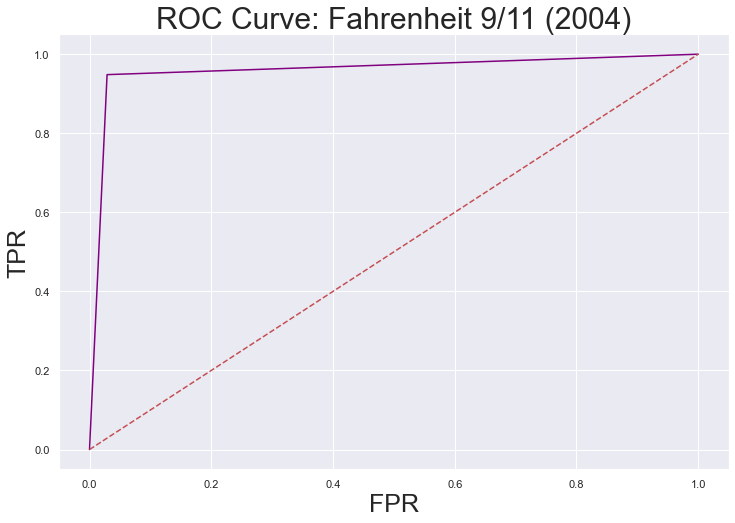

Area under ROC Curve (AUROC):  0.9597148541114058


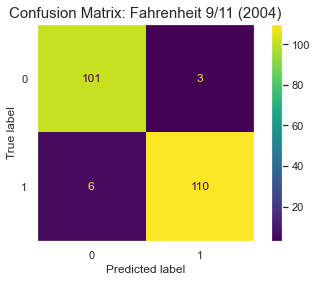


 

Happy Gilmore (1996)
Model Coef:  [[5.13522475]]
Accuracy of the model is: 0.900


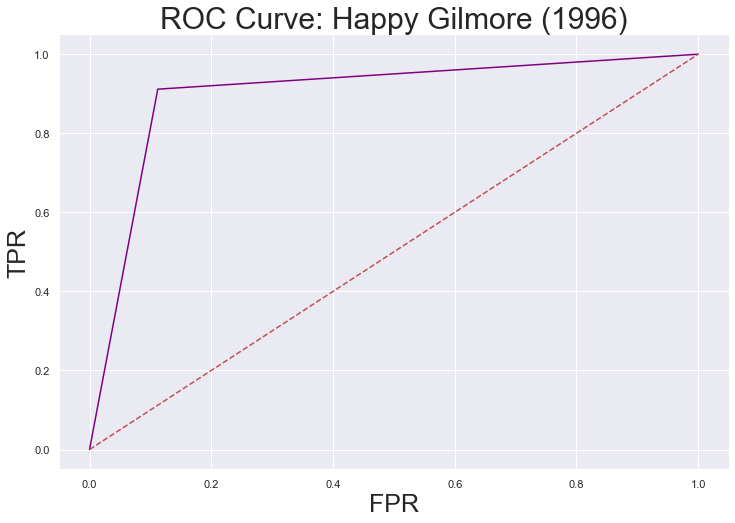

Area under ROC Curve (AUROC):  0.8996774460342403


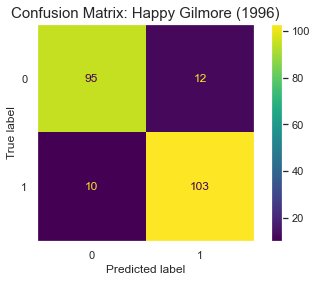


 

Diamonds are Forever (1971)
Model Coef:  [[7.21696273]]
Accuracy of the model is: 0.941


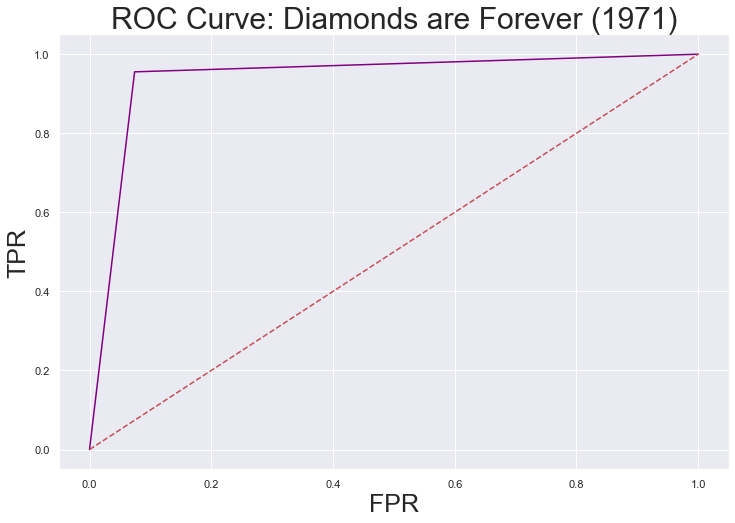

Area under ROC Curve (AUROC):  0.9406415343915344


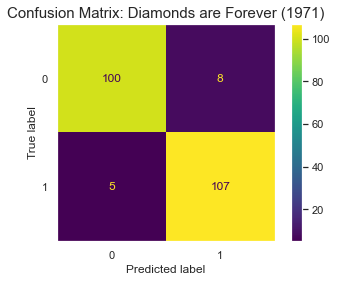


 

Scream (1996)
Model Coef:  [[4.35351802]]
Accuracy of the model is: 0.832


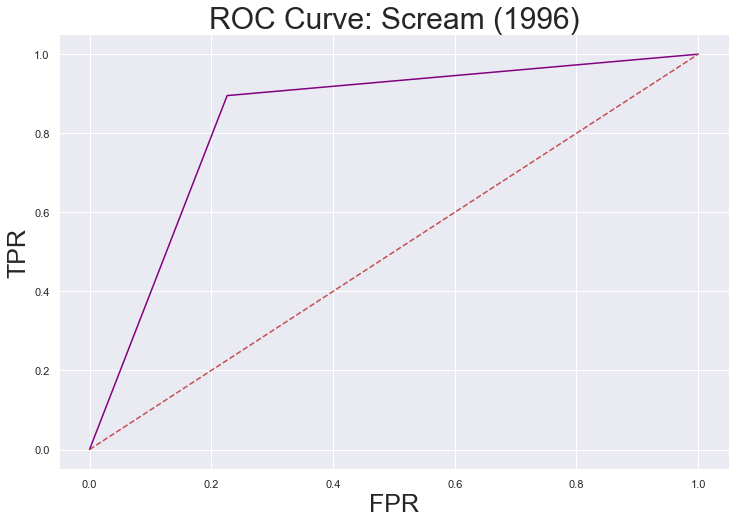

Area under ROC Curve (AUROC):  0.834575569358178


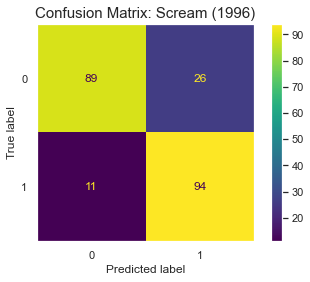

In [48]:
# Compute average movie enjoyment for each user
enjoy_users = data_ratings

# Predictor Variable X
X = np.array(enjoy_users.mean(axis=1))
X = X.reshape(-1,1)
# print(X.shape)

# Compute Average Movie Rating and Sort
movies_avg_rating = enjoy_users.mean(axis=0) # get the avg of ratings for each movie
mar_reshape = movies_avg_rating.values.reshape(1,400)
mar_append = enjoy_users.append(pd.DataFrame(mar_reshape, columns=enjoy_users.columns), ignore_index=True) # append avgs to df
sorted_movies = mar_append.sort_values(mar_append.last_valid_index(), axis=1) #sort df by rating avgs
sorted_movies = sorted_movies.iloc[:1096,198:202] # movies in middle of range, drop median values in last row
# display(sorted_movies)

# find median value for each movie
movies_4 = movieRatings.loc[:,['Fahrenheit 9/11 (2004)','Happy Gilmore (1996)','Diamonds are Forever (1971)', 'Scream (1996)']]
movies_4_med = movies_4.median(axis=0) # get the median of ratings for each movie
# display(movies_4_med)

# Code movies
movies_4["Fahrenheit 9/11 (2004)"] = np.where(movies_4["Fahrenheit 9/11 (2004)"] < movies_4_med[0], 0, 1)
movies_4["Happy Gilmore (1996)"] = np.where(movies_4["Happy Gilmore (1996)"] < movies_4_med[1], 0, 1)
movies_4["Diamonds are Forever (1971)"] = np.where(movies_4["Diamonds are Forever (1971)"] < movies_4_med[2], 0, 1)
movies_4["Scream (1996)"] = np.where(movies_4["Scream (1996)"] < movies_4_med[3], 0, 1)

outcomes = movies_4

for i in outcomes:
    Y = np.array(outcomes[i])
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
    print(i)
    logReg = LogisticRegression()
    logReg.fit(x_train, y_train)
    y_pred = logReg.predict(x_test)
    print("Model Coef: ", logReg.coef_)
    print("Accuracy of the model is: %.3f" % accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    random_classifier=np.linspace(0.0, 1.0, 100)
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, color="purple")
    plt.plot(random_classifier, random_classifier, 'r--')
    plt.xlabel("FPR", fontsize=25)
    plt.ylabel("TPR", fontsize=25)
    plt.title("ROC Curve: " + str(i), fontsize=30)
    plt.show()
    print("Area under ROC Curve (AUROC): ", auc(fpr, tpr))
    ## Confusion Matrix for the predicted outputs
    conf_matrix_sk = confusion_matrix(y_test, y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sk, display_labels=logReg.classes_)
    disp.plot()
    plt.title("Confusion Matrix: " + str(i), fontsize=15)
    plt.grid()
    plt.show()
    print('\n \n')
    
    
# average enjoyment is a good predictor of whether or not users would enjoy these 4 movies

# EXTRA CREDIT

Perform a lasso regression to find the influence of various personality responses on enjoyment of 4 horror/thriller movies, do grid search for hypertuning

Questions:
I enjoy watching horror movies,
I like to be surprised even if it startles or scares me,
I enjoy haunted houses,
Is emotionally stable/not easily upset,
Can be cold and aloof,
No risk - No fun,
I had a sheltered upbringing,
Has an active imagination,
Remains calm in tense situations,
Is depressed/Blue

Movies:
The Blair Witch Project (1999),
Ouija: Origin of Evil (2016),
Shutter Island (2010),
The Exorcist (1973)

In [82]:
# Make df with 4 movies of interest
horror_movies_df = movieRatings.loc[:,['The Blair Witch Project (1999)', 'Ouija: Origin of Evil (2016)',
                                     'Shutter Island (2010)', 'The Exorcist (1973)']]

# Make df with personality/sensation responses of interest
user_responses_df = data.loc[:,['I enjoy watching horror movies', 'I like to be surprised even if it startles or scares me',
                               'I enjoy haunted houses', 'Is emotionally stable/not easily upset', 'Can be cold and aloof',
                               'No risk - No fun', 'I had a sheltered upbringing', 'Has an active imagination', 'Remains calm in tense situations',
                               'Is depressed/Blue']]
user_responses_df = user_responses_df.drop(896) # drop null user
user_responses_df = user_responses_df.reset_index(drop=True)

lasso_horror_df = pd.concat([horror_movies_df, user_responses_df], axis=1) # merge columns, 1096 rows
# display(lasso_horror_df)

# check for null values
# print(lasso_horror_df.isnull().sum())

lasso_horror_df = lasso_horror_df.dropna().reset_index(drop=True) # drop null value rows, 20 rows
# display(lasso_horror_df)

# check responses for anything outside of normal range
#lasso_horror_df.loc[(lasso_horror_df["I enjoy haunted houses"] < 1.0) | (lasso_horror_df["I enjoy haunted houses"] > 5.0)]

# split data frames up into outcomes and predictors, now have same length row-wise
outcomes = lasso_horror_df.iloc[:,0:4].reset_index(drop=True)
predictors = lasso_horror_df.iloc[:,4:14].reset_index(drop=True)

display(outcomes)
display(predictors)

,The Blair Witch Project (1999),Ouija: Origin of Evil (2016),Shutter Island (2010),The Exorcist (1973)
0,2.609801,2.408231,2.945611,0.000000
1,2.602008,2.400438,2.937819,2.576253
2,2.895780,2.694209,3.231590,2.870024
3,2.445689,2.244119,2.781499,2.419934
4,2.371847,2.170277,2.707657,2.346091
...,...,...,...,...
1071,2.838372,2.636802,3.174182,2.812617
1072,4.000000,2.873637,4.000000,4.000000
1073,2.804637,2.603067,3.140447,2.778882
1074,2.933685,2.732115,3.269495,2.907929


,I enjoy watching horror movies,I like to be surprised even if it startles or scares me,I enjoy haunted houses,Is emotionally stable/not easily upset,Can be cold and aloof,No risk - No fun,I had a sheltered upbringing,Has an active imagination,Remains calm in tense situations,Is depressed/Blue
0,1.0,5.0,1.0,4.0,4.0,3.0,1.0,5.0,5.0,4.0
1,1.0,4.0,1.0,4.0,4.0,3.0,4.0,5.0,4.0,1.0
2,1.0,1.0,1.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0
3,4.0,4.0,4.0,3.0,1.0,1.0,4.0,4.0,2.0,4.0
4,1.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
1071,1.0,3.0,1.0,1.0,3.0,3.0,4.0,4.0,3.0,4.0
1072,5.0,5.0,1.0,5.0,5.0,4.0,5.0,5.0,4.0,2.0
1073,1.0,2.0,1.0,3.0,2.0,2.0,4.0,4.0,3.0,4.0
1074,2.0,3.0,1.0,2.0,3.0,2.0,4.0,5.0,4.0,3.0


In [1]:
# multiple features, check for multicollinearity
plt.figure(figsize = (16,5))
sns.heatmap(user_responses_df.corr(), annot=True, ) #should have used predictors df
plt.show()

NameError: name 'plt' is not defined

In [96]:
#create alpha range
parameters = {'alpha':[c for c in np.arange(0, 1, 0.0001)]}

# set up gridsearchCV
model = Lasso()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10) #cross-validation method for gridsearch
ec_lasso_grid = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=cv)

# intitialize lists
ec_rmse_lasGrid = []
ec_movie_name_lasGrid = []
ec_betas_lasGrid = []
ec_alpha_lasGrid = []

# loop through 4 movies
for i in outcomes:
    Y = np.array(outcomes[i])
    X = np.array(predictors)
    
    # split data set into train test splits
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
    
    # use gridsearch to split training data into train and validation set and find best alpha hyperparameter
    ec_lasso_grid.fit(x_train, y_train)
    best_alpha = ec_lasso_grid.best_estimator_.alpha
    print("The best parameters of Grid Search are as follows: {} with a score of {}".format(ec_lasso_grid.best_params_, np.round(ec_lasso_grid.best_score_, 3)))
    
    # Use Best Alpha for calculating coefficients and RMSE
    ec_lassoReg = Lasso(alpha=best_alpha) # input best alpha found for that model
    ec_lassoReg.fit(x_train, y_train)
    y_pred = ec_lassoReg.predict(x_test)
    
    # append values to lists
    ec_movie_name_lasGrid.append(i)
    ec_rmse_lasGrid.append(mean_squared_error(y_test, y_pred))
    ec_betas_lasGrid.append(lassoReg.coef_)
    ec_alpha_lasGrid.append(best_alpha)

The best parameters of Grid Search are as follows: {'alpha': 0.0748} with a score of -0.377
The best parameters of Grid Search are as follows: {'alpha': 0.0857} with a score of -0.314
The best parameters of Grid Search are as follows: {'alpha': 0.0261} with a score of -0.332
The best parameters of Grid Search are as follows: {'alpha': 0.023100000000000002} with a score of -0.555


In [97]:
# Initialize dictionary for RMSE table
ec_table_RMSE_lasGrid = {'Movie': [], 'RMSE': [], 'alpha': []}

# Create New COD table dictionary
ec_table_RMSE_lasGrid['Movie'] = ec_movie_name_lasGrid
ec_table_RMSE_lasGrid['RMSE'] = ec_rmse_lasGrid
ec_table_RMSE_lasGrid['alpha'] = ec_alpha_lasGrid

# Convert RMSE table dictionary into pandas dataframe
ec_table_RMSE_lasGrid = pd.DataFrame(ec_table_RMSE_lasGrid)
display(ec_table_RMSE_lasGrid)

# Create dataframe for coefficients
ec_betas_df_lasGrid = pd.DataFrame(columns=predictors.columns)
ec_betas_df_lasGrid = ec_betas_df_lasGrid.append(pd.DataFrame(ec_betas_lasGrid, columns=ec_betas_df_lasGrid.columns))
ec_betas_df_lasGrid_2 = ec_betas_df_lasGrid
ec_betas_df_lasGrid_3 = ec_betas_df_lasGrid_2.set_index(outcomes.columns)

display(ec_betas_df_lasGrid_3)

,Movie,RMSE,alpha
0,The Blair Witch Project (1999),0.434041,0.0748
1,Ouija: Origin of Evil (2016),0.368878,0.0857
2,Shutter Island (2010),0.434947,0.0261
3,The Exorcist (1973),0.522405,0.0231


,I enjoy watching horror movies,I like to be surprised even if it startles or scares me,I enjoy haunted houses,Is emotionally stable/not easily upset,Can be cold and aloof,No risk - No fun,I had a sheltered upbringing,Has an active imagination,Remains calm in tense situations,Is depressed/Blue
The Blair Witch Project (1999),0.126886,0.145169,0.089106,0.051561,0.082651,0.027925,0.092332,0.042854,0.030811,0.058021
Ouija: Origin of Evil (2016),0.126886,0.145169,0.089106,0.051561,0.082651,0.027925,0.092332,0.042854,0.030811,0.058021
Shutter Island (2010),0.126886,0.145169,0.089106,0.051561,0.082651,0.027925,0.092332,0.042854,0.030811,0.058021
The Exorcist (1973),0.126886,0.145169,0.089106,0.051561,0.082651,0.027925,0.092332,0.042854,0.030811,0.058021
